In [173]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [174]:
import numpy as np
np.seterr(divide='ignore')
import math
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
##READ THE DATA
previous_application = pd.read_csv("E:\\previous_application (1).csv")
application = pd.read_csv("E:\\application_data (1).csv")

# CLEANING OF DATA

In [176]:
application.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [177]:
#Removing few uncessary columns since there are many columns and all are not visible here
#We will try removing the columns first with more than 50% of null values

cols = application.columns[application.isnull().mean()>0.5]
application = application.drop(cols, axis=1)
application


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
#to further reduce the columns because they are still many, we will try to drop columns we think will not be needed for analysis.
application = application.drop('FLAG_DOCUMENT_2', axis = 1)
application = application.drop('FLAG_DOCUMENT_3', axis = 1)
application = application.drop('FLAG_DOCUMENT_4', axis = 1)
application = application.drop('FLAG_DOCUMENT_5', axis = 1)
application = application.drop('FLAG_DOCUMENT_6', axis = 1)
application = application.drop('FLAG_DOCUMENT_7', axis = 1)
application = application.drop('FLAG_DOCUMENT_8', axis = 1)
application = application.drop('FLAG_DOCUMENT_9', axis = 1)
application = application.drop('FLAG_DOCUMENT_10', axis = 1)
application = application.drop('FLAG_DOCUMENT_11', axis = 1)
application = application.drop('FLAG_DOCUMENT_12', axis = 1)
application = application.drop('FLAG_DOCUMENT_13', axis = 1)
application = application.drop('FLAG_DOCUMENT_14', axis = 1)
application = application.drop('FLAG_DOCUMENT_15', axis = 1)
application = application.drop('FLAG_DOCUMENT_16', axis = 1)
application = application.drop('FLAG_DOCUMENT_17', axis = 1)
application = application.drop('FLAG_DOCUMENT_18', axis = 1)
application = application.drop('FLAG_DOCUMENT_19', axis = 1)
application = application.drop('FLAG_DOCUMENT_20', axis = 1)
application = application.drop('FLAG_DOCUMENT_21', axis = 1)

round(100*(application.isnull().sum()/len(application.index)),2)


SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 61, dtype: float64

In [179]:
#Since the number of columns are still high 
#So regardless of column being important or not we aare only goig to select columns we need for anaysis

application2 = application.iloc[:, :30]
#dropping few more
application2 = application2.drop('FLAG_EMAIL', axis = 1)
application2 = application2.drop('FLAG_PHONE', axis = 1)
application2 = application2.drop('FLAG_WORK_PHONE', axis = 1)
application2 = application2.drop('FLAG_EMP_PHONE', axis = 1)
application2 = application2.drop('DAYS_REGISTRATION', axis = 1)
application2 = application2.drop('DAYS_ID_PUBLISH', axis = 1)

application2['ORGANIZATION_TYPE']= application.ORGANIZATION_TYPE

In [180]:
application2.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
FLAG_MOBIL                        0
FLAG_CONT_MOBILE                  0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT              0
ORGANIZATION_TYPE                 0
dtype: int64

# Impute/Remove Missing Values

In [181]:
#Column AMT_ANNUITY  has 12 missing values which is approx 0.03% of missing values
#Since the amount of null values here is less, we can take the risk of removing the rows with such missing values as it won't affect drastically 307511 rows

#application3 = application2[~application2.AMT_ANNUITY.isnull()].copy()
application2 = application2.dropna(axis=0, subset=['AMT_ANNUITY'])
application2.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
FLAG_MOBIL                        0
FLAG_CONT_MOBILE                  0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT              0
ORGANIZATION_TYPE                 0
dtype: int64

In [182]:
#Column AMT_GOODS_PRICE has 278 missing values which is approx 0.09% of missing values
AMT_GOODS_PRICE_MEAN = application2.AMT_GOODS_PRICE.mean()
application2.AMT_GOODS_PRICE.fillna(AMT_GOODS_PRICE_MEAN, inplace= True)
application2.isnull().sum()


SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
FLAG_MOBIL                        0
FLAG_CONT_MOBILE                  0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT              0
ORGANIZATION_TYPE                 0
dtype: int64

In [183]:
#NAME_TYPE_SUITE has categorical values hence for handling the null values here we can replace it with the most occuring one i.e the mode
NAME_TYPE_SUITE_MODE = application2.NAME_TYPE_SUITE.mode()[0]
application2.NAME_TYPE_SUITE.fillna(NAME_TYPE_SUITE_MODE, inplace = True)
application2.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
FLAG_MOBIL                        0
FLAG_CONT_MOBILE                  0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT              0
ORGANIZATION_TYPE                 0
dtype: int64

In [184]:
#OCCUPATION_TYPE has about 96391 null values. Rather than filling it with mode, we will fill it with a diff category 'Other' because
#the number of null values here are comparatively more and simply filling with mode would be a bit unfair with the analysis
application2.OCCUPATION_TYPE.fillna("Other", inplace =True)
application2.isnull().sum()


SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
FLAG_MOBIL                    0
FLAG_CONT_MOBILE              0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               2
REGION_RATING_CLIENT          0
ORGANIZATION_TYPE             0
dtype: int64

In [185]:
CNT_FAM_MEMBERS_MEAN = application2.CNT_FAM_MEMBERS.mean()
application2.CNT_FAM_MEMBERS.fillna(CNT_FAM_MEMBERS_MEAN, inplace= True)
application2.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
FLAG_MOBIL                    0
FLAG_CONT_MOBILE              0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
REGION_RATING_CLIENT          0
ORGANIZATION_TYPE             0
dtype: int64

In [186]:
application2.DAYS_EMPLOYED = application2.DAYS_EMPLOYED*(-1)
application2.DAYS_EMPLOYED

0            637
1           1188
2            225
3           3039
4           3038
           ...  
307506       236
307507   -365243
307508      7921
307509      4786
307510      1262
Name: DAYS_EMPLOYED, Length: 307499, dtype: int64

In [187]:


application2.DAYS_BIRTH = application2.DAYS_BIRTH*(-1) 
application2.DAYS_BIRTH = application2.DAYS_BIRTH/365
application2.DAYS_BIRTH
application2.DAYS_BIRTH = application2.DAYS_BIRTH.astype(int)
application2.DAYS_BIRTH

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: DAYS_BIRTH, Length: 307499, dtype: int32

# Handling Outliers

In [188]:
#We can clearly see the 'max' of AMT_INCOME_TOTAL is way high
round(application2.AMT_INCOME_TOTAL.describe(), 1)

count       307499.0
mean        168797.2
std         237127.4
min          25650.0
25%         112500.0
50%         146997.0
75%         202500.0
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

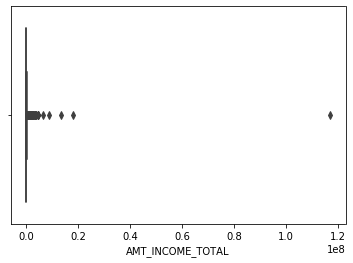

In [189]:
#Since we can only see one such data point with a huge difference in the graph
#We can remove it. If they were more we would have capped them
sns.boxplot(application2.AMT_INCOME_TOTAL)
plt.show()

In [190]:
application2 = application2[application2['AMT_INCOME_TOTAL'] < 117000000]
round(application2.AMT_INCOME_TOTAL.describe(),1)
#Most columns have been checked and didn't find any major outlier to handle

count      307498.0
mean       168417.3
std        108813.0
min         25650.0
25%        112500.0
50%        146904.8
75%        202500.0
max      18000090.0
Name: AMT_INCOME_TOTAL, dtype: float64

# Univariate Analysis

Categorical Univariate Analysis

In [191]:
application2.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int32
DAYS_EMPLOYED                   int64
FLAG_MOBIL                      int64
FLAG_CONT_MOBILE                int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
REGION_RATING_CLIENT            int64
ORGANIZATION_TYPE              object
dtype: object

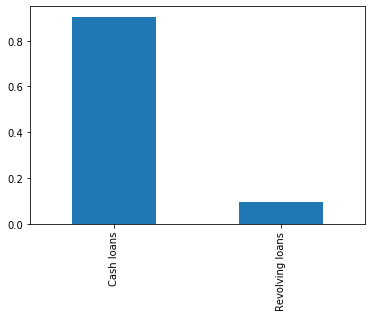

In [192]:
application2.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.show()
#People tend to opt for cash loans more

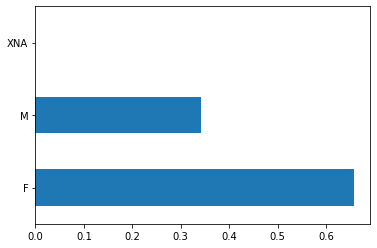

In [193]:
application2.CODE_GENDER.value_counts(normalize=True).plot.barh()
plt.show()
#We find more female clients

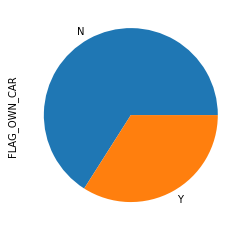

In [194]:
application2.FLAG_OWN_CAR.value_counts(normalize=True).plot.pie()
plt.show()
#We find most people don't own a car previously

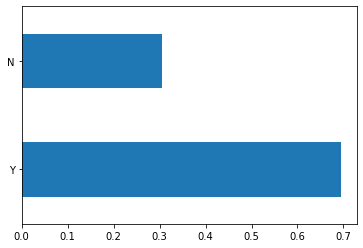

In [195]:
application2.FLAG_OWN_REALTY.value_counts(normalize=True).plot.barh()
plt.show()
#Most own a house or a flat

<function matplotlib.pyplot.show(*args, **kw)>

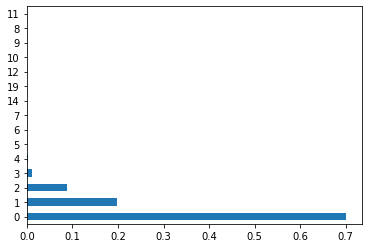

In [196]:
application2.CNT_CHILDREN.value_counts(normalize=True).plot.barh()
plt.show
#We see that people with no children are coming for loan application the most
#Applicants with number of children greater than 3 are neglible

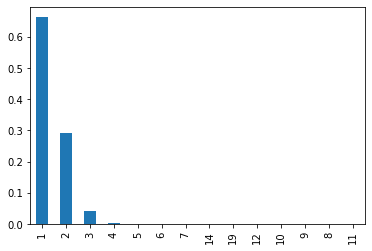

In [197]:
application2[~(application2.CNT_CHILDREN == 0)].CNT_CHILDREN.value_counts(normalize=True).plot.bar()
plt.show()
#applicants with more than 3 kids are negligible even after removing applicants with 0 children.

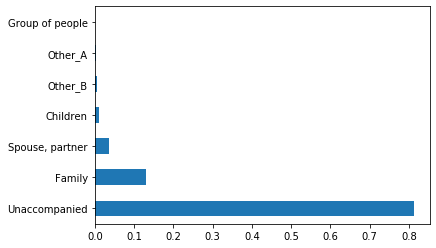

In [198]:
application2.NAME_TYPE_SUITE.value_counts(normalize=True).plot.barh()
plt.show()
#Not much insights but clients usually come alone

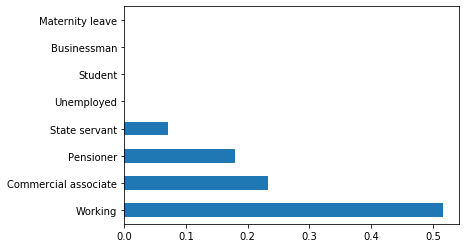

In [199]:
application2.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.show()
#Mostly people who are earing, except the businessmen are applying.
#Pensioner still can be consiered earing as they are getting monthly income
#We also find how businessmen even though they are earing too,their applying for loan is negligible
#compared to the people who are working 

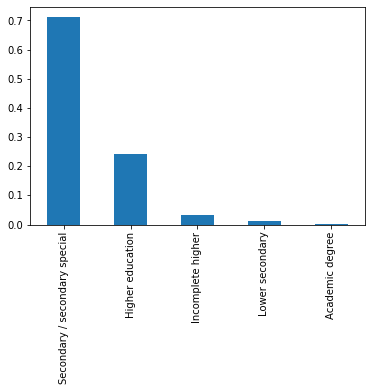

In [200]:
application2.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.show()
#Clients with secondary level education come the most than higher education
#Applicants with improper education level like either incomplete or maybe lower secondary or just an academic degree come almost negligible



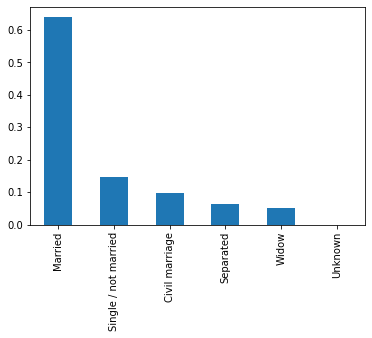

In [201]:
application2.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.show()
#married clients are applying the most

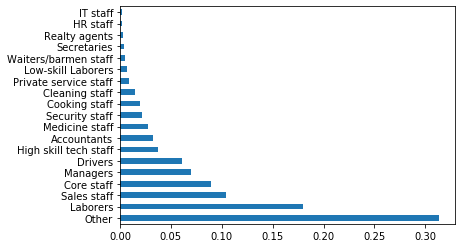

In [202]:
application2.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

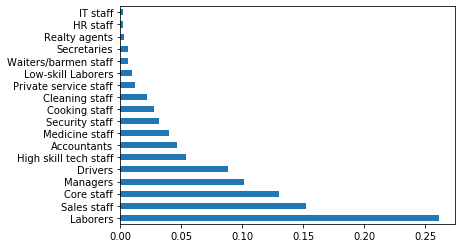

In [203]:
#So lets exclude the 'other' category for further insights as 'other' has been added by us
application2[~(application2.OCCUPATION_TYPE == "Other")].OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

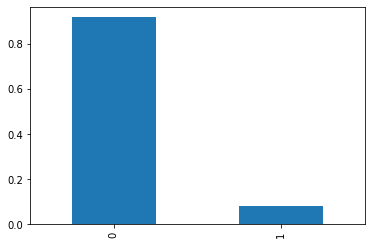

In [204]:
application2.TARGET.value_counts(normalize=True).plot.bar()
plt.show()

In [205]:
#For variables with integer values in columns we perform binning
application2['AMT_INCOME_TOTAL_BINS'] = pd.cut(x=application2['AMT_INCOME_TOTAL'], bins=[0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,950000,1000000,18000090])

In [206]:
application2['AMT_INCOME_TOTAL_BINS']

0         (200000, 250000]
1         (250000, 300000]
2          (50000, 100000]
3         (100000, 150000]
4         (100000, 150000]
                ...       
307506    (150000, 200000]
307507     (50000, 100000]
307508    (150000, 200000]
307509    (150000, 200000]
307510    (150000, 200000]
Name: AMT_INCOME_TOTAL_BINS, Length: 307498, dtype: category
Categories (21, interval[int64]): [(0, 50000] < (50000, 100000] < (100000, 150000] < (150000, 200000] ... (850000, 900000] < (900000, 950000] < (950000, 1000000] < (1000000, 18000090]]

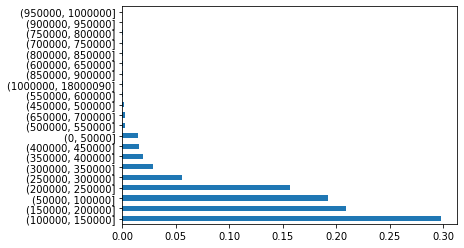

In [207]:
application2.AMT_INCOME_TOTAL_BINS.value_counts(normalize=True).plot.barh()
plt.show()
#Income of the clients between 1,00,000 to 1,50,000 are applying more for loan

In [208]:
application2['AMT_INCOME_TOTAL_BINS'] = pd.cut(x=application2['AMT_INCOME_TOTAL'], bins=[10000,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,950000,1000000,18000090])

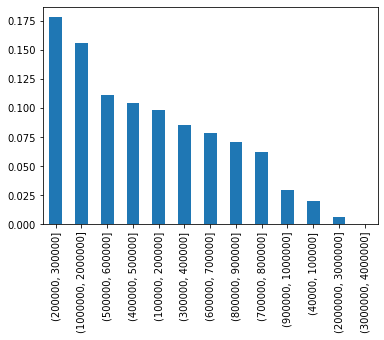

In [209]:
application2['AMT_CREDIT_BINS'] = pd.cut(x=application2['AMT_CREDIT'], bins=[40000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,2000000,3000000,4000000])
application2.AMT_CREDIT_BINS.value_counts(normalize=True).plot.bar()
plt.show()
#Credit amount of the loan higest for 2lacs to 3lacs
#Suprisingly second highest credit amount  is around 10lacs to 20lacs

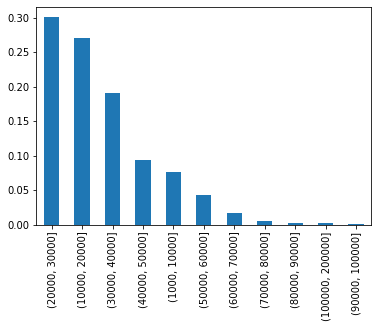

In [210]:
application2['AMT_ANNUITY_BINS'] = pd.cut(x=application2['AMT_ANNUITY'], bins=[1000,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,200000])
application2.AMT_ANNUITY_BINS.value_counts(normalize=True).plot.bar()
plt.show()
#Aroud 10,000 to 30,000 annuity is higher
#gradually decreases after 50,000

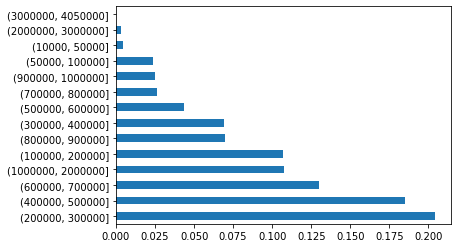

In [211]:
application2['AMT_GOODS_PRICE_BINS'] = pd.cut(x=application2['AMT_GOODS_PRICE'], bins=[10000,50000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,2000000,3000000,4050000])
application2.AMT_GOODS_PRICE_BINS.value_counts(normalize=True).plot.barh()
plt.show()
#the consumer loan is most for the price of the goods around 2lacs to 3lacs 
#gradually decreases as the prices for goods get high. 
#We also find that number of clients coming for the price of goods for 1lacs to 2 lacs and 10lacs to 20lacs are almost same


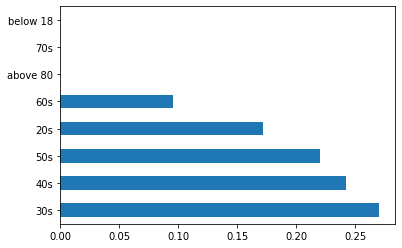

In [212]:
application2['DAYS_BIRTH_BINS'] = pd.cut(x=application2['DAYS_BIRTH'], bins=[0,18,30,40,50,60,70,80,100], labels=['below 18','20s','30s','40s','50s','60s','70s','above 80'])
application2.DAYS_BIRTH_BINS.value_counts(normalize=True).plot.barh()
plt.show()
#Applicants Above 70 are negligible
#Same with below 18
#Most applicants are from the age group of 30 to 60. The maximum are from the age group of 30s 

# Bivariate Analysis


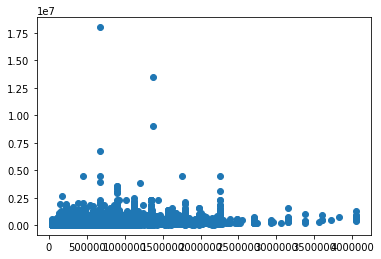

In [213]:
plt.scatter(application2.AMT_GOODS_PRICE, application2.AMT_INCOME_TOTAL)
plt.show()
#not much of a strong association between good price and income, though we notice we high data points

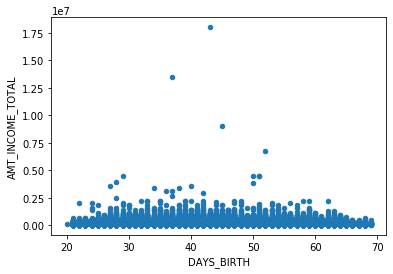

In [214]:
application2.plot.scatter(x="DAYS_BIRTH",y="AMT_INCOME_TOTAL")
plt.show()
##not much of a strong association between age and income, though we notice we high data points

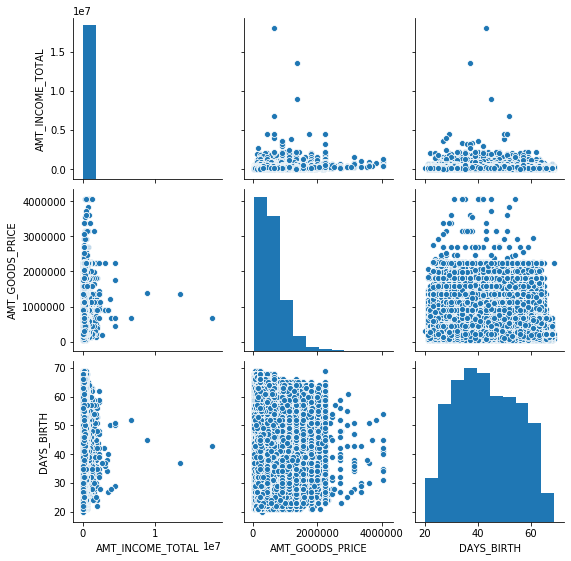

In [215]:
#Lets try pair plot with these three variables 
sns.pairplot(data = application2 , vars=["AMT_INCOME_TOTAL","AMT_GOODS_PRICE","DAYS_BIRTH"])
plt.show()

In [216]:
#Quantify using correlation values
#correlation coefficient depicts only a linear relationship between numerical variables
#It does not depict any other relationship between variables
#A zero correlation does not imply that there is no relation between variables
#it merely indicates that there will no linear relationship between them

In [217]:
application2[["AMT_INCOME_TOTAL","AMT_GOODS_PRICE","DAYS_BIRTH"]].corr()

,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,DAYS_BIRTH
AMT_INCOME_TOTAL,1.000000,0.348591,-0.05658
AMT_GOODS_PRICE,0.348591,1.000000,0.05339
DAYS_BIRTH,-0.056580,0.053390,1.00000


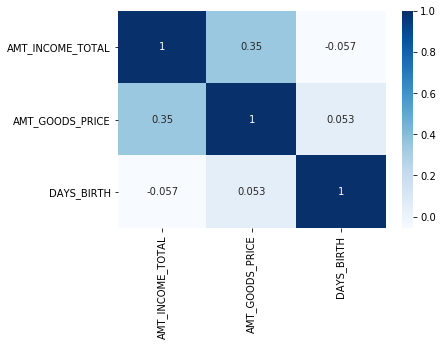

In [218]:
#Correlation Heatmap
sns.heatmap(application2[["AMT_INCOME_TOTAL","AMT_GOODS_PRICE","DAYS_BIRTH"]].corr(), annot= True, cmap= "Blues")
plt.show()
#didn't find any strong correlation between these variables

# Correlation on all the variables to find top-10 for both Target=0 and Target=1

In [219]:
corr = application2.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns = ['VAR1', 'VAR2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df['Correlation'] = corr_df['Correlation'].round(2)
corr_df['Correlation'] = corr_df['Correlation'].abs()
corr_df.sort_values(by = 'Correlation', ascending = False, inplace = True)
corr_df.head(10)

,VAR1,VAR2,Correlation
88,AMT_GOODS_PRICE,AMT_CREDIT,0.99
170,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
89,AMT_GOODS_PRICE,AMT_ANNUITY,0.77
74,AMT_ANNUITY,AMT_CREDIT,0.77
134,DAYS_EMPLOYED,DAYS_BIRTH,0.62
189,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.53
73,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42
87,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.35
59,AMT_CREDIT,AMT_INCOME_TOTAL,0.34
114,DAYS_BIRTH,CNT_CHILDREN,0.33


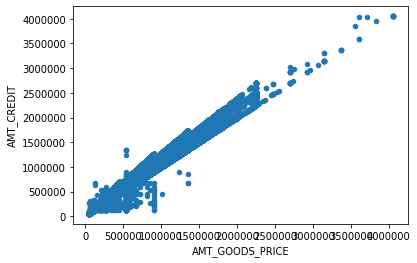

In [220]:
application2.plot.scatter(x="AMT_GOODS_PRICE",y="AMT_CREDIT")
plt.show()
#Highest correlation between he price of the goods for which the loan is given and Credit amount of the loan



# Bivariate analysis wrt Target variable

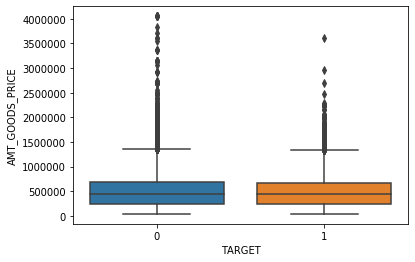

In [221]:
sns.boxplot(data= application2, x="TARGET", y="AMT_GOODS_PRICE")
plt.show()


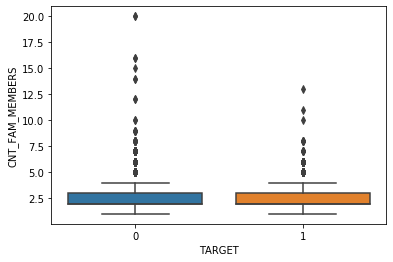

In [222]:
sns.boxplot(data= application2, x="TARGET", y="CNT_FAM_MEMBERS")
plt.show()

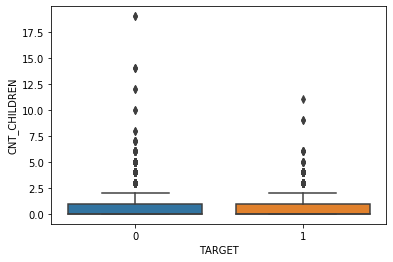

In [223]:
sns.boxplot(data= application2, x="TARGET", y="CNT_CHILDREN")
plt.show()

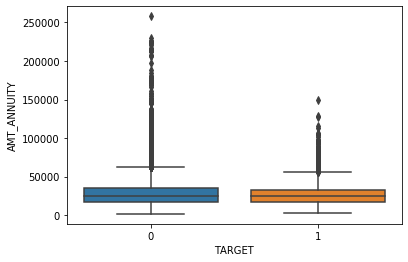

In [224]:
sns.boxplot(data= application2, x="TARGET", y="AMT_ANNUITY")
plt.show()

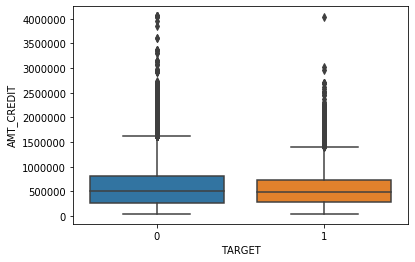

In [225]:
sns.boxplot(data= application2, x="TARGET", y="AMT_CREDIT")
plt.show()
#We notice the upper fence is a bit higher for 0, to get more clarification we will try to plot with the bins we created wrt Target for credi amt.


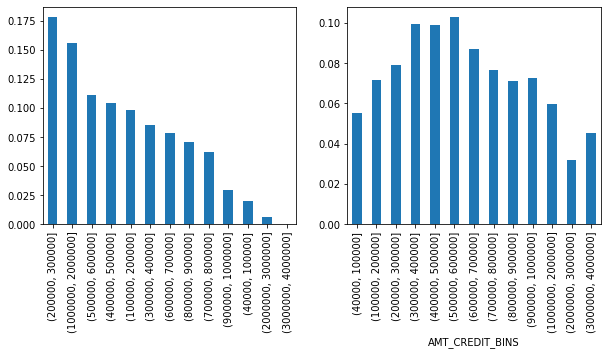

In [226]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
application2.AMT_CREDIT_BINS.value_counts(normalize= True).plot.bar()
plt.subplot(1,2,2)
application2.groupby(['AMT_CREDIT_BINS'])['TARGET'].mean().plot.bar()
plt.show()
#client more likely to have payment difficulties with loan credit amount 2lacs to 6lacs
#highest for 2lacs to 3lacs

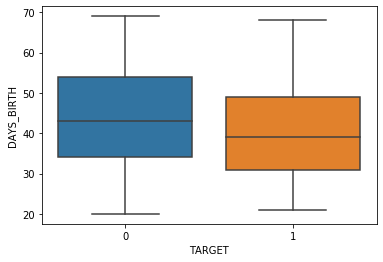

In [227]:
sns.boxplot(data= application2, x="TARGET", y="DAYS_BIRTH")
plt.show()
#we notice a slight difference, interquartile range for clients who have payment difficulties below the age of 50.
#Also above 50 were also third highest as loan applicants

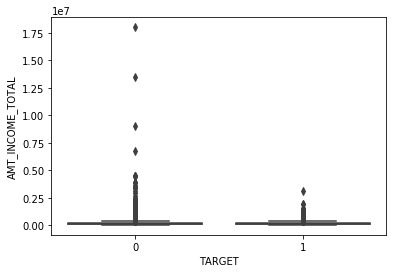

In [228]:
sns.boxplot(data= application2, x="TARGET", y="AMT_INCOME_TOTAL")
plt.show()
#Sometimes only a boxplot is not sufficient to draw insights,
#because of a high concentration of data and or because of higher values in the data set

In [229]:
##75 percentile
def p75(x):
    return np.quantile(x,0.75)

In [230]:
#Still no significance difference found more than the boxplot
application2.groupby('TARGET')['AMT_INCOME_TOTAL'].aggregate(["mean","median",p75])

,mean,median,p75
TARGET,,,
0,169076.987966,148500.0,202500.0
1,160905.251551,135000.0,202500.0


In [231]:
##Bivariate categorical-categorical analysis

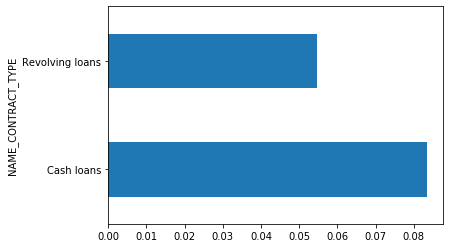

In [232]:
application2.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].mean().plot.barh()
plt.show()
#We can see application with cash loans are tend to be going towards more paymnet difficulties
#But we also see from the univariate that clients come for cash loans the more

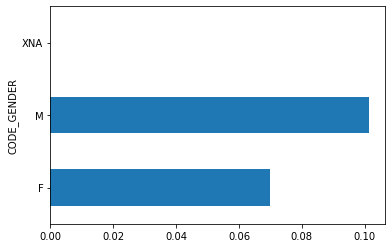

In [233]:
application2.groupby(['CODE_GENDER'])['TARGET'].mean().plot.barh()
plt.show()
#Suprisingly female clients were more as per univariate analysis
#but still we see Males are more likely to have payment difficulty than female

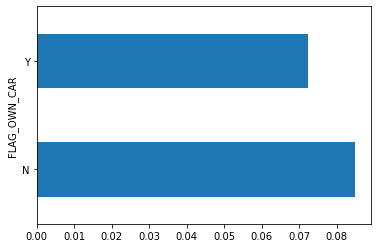

In [234]:
application2.groupby(['FLAG_OWN_CAR'])['TARGET'].mean().plot.barh()
plt.show()
#People owning a car compared to not owing are less likey to have payment difficulties

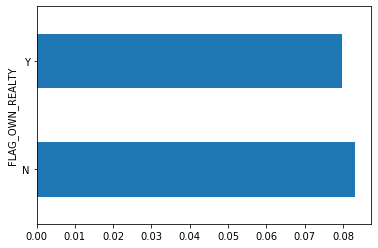

In [235]:
application2.groupby(['FLAG_OWN_REALTY'])['TARGET'].mean().plot.barh()
plt.show()
#not much of a difference

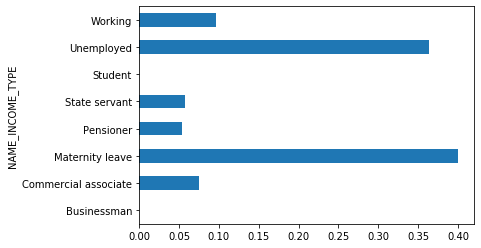

In [236]:
application2.groupby(['NAME_INCOME_TYPE'])['TARGET'].mean().plot.barh()
plt.show()
#We can see that Unemployed clients and clients with maternity leave have higher tendency to have payment difficulties
#even though they were less in numbers
#Even though working class are applying for loan the highest but still has lower rates of payment difficulties compared to others
#Surely working clients are  likely to repay the loan

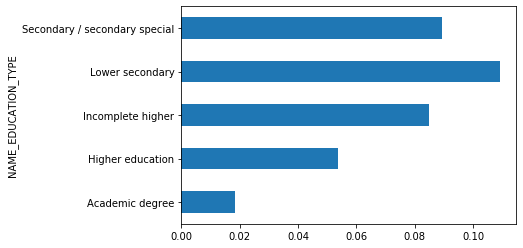

In [237]:
application2.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].mean().plot.barh()
plt.show()
#From the previous univariate analysis we could see that clients with lower secondary education and incomplete higher education
#were comparatively low in numbers
#and still have high payment difficulties
#We can clearly see lower secondary has the highest payment difficulties
#Such clients are not likely to repay the loan,

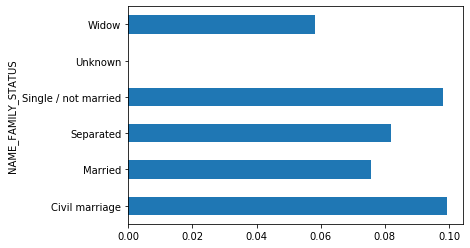

In [238]:
application2.groupby(['NAME_FAMILY_STATUS'])['TARGET'].mean().plot.barh()
plt.show()
#Clients with civil marriage were very less in numbers comparatively and as per the bar plot, also has very high tendency
#to have payment difficulties

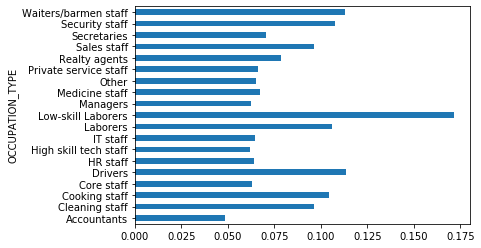

In [239]:
application2.groupby(['OCCUPATION_TYPE'])['TARGET'].mean().plot.barh()
plt.show()
#Low-skill laborers are likey to have payment difficulties
#Laborers comparatively have less chances to have payment difficulties considerig that they were highest in numbers

# Merging the datasets

In [240]:
Merged_df = pd.merge(left=application2, right=previous_application, how='inner', on='SK_ID_CURR', suffixes='_x')


In [241]:
Merged_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413600,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1413601,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1413602,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1413603,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0


In [242]:
previous_application.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [243]:
#top ten correlation on Merged_df
corr = Merged_df.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns = ['VAR1', 'VAR2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df['Correlation'] = corr_df['Correlation'].round(2)
corr_df['Correlation'] = corr_df['Correlation'].abs()
corr_df.sort_values(by = 'Correlation', ascending = False, inplace = True)
corr_df.head(10)

,VAR1,VAR2,Correlation
662,AMT_GOODS_PRICEx,AMT_APPLICATION,1.00
208,AMT_GOODS_PRICE_,AMT_CREDIT_,0.99
663,AMT_GOODS_PRICEx,AMT_CREDITx,0.99
594,AMT_CREDITx,AMT_APPLICATION,0.98
1119,DAYS_TERMINATION,DAYS_LAST_DUE,0.93
410,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
593,AMT_CREDITx,AMT_ANNUITYx,0.82
661,AMT_GOODS_PRICEx,AMT_ANNUITYx,0.82
559,AMT_APPLICATION,AMT_ANNUITYx,0.81
1048,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,0.81


# UNIVARIATE AND BIVARIATE ANALYSIS

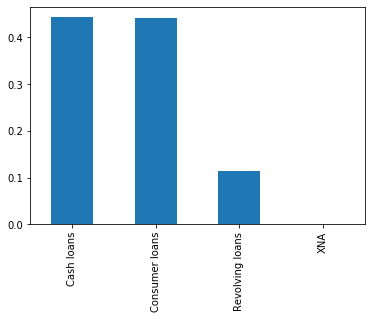

In [244]:
##Univariate
Merged_df.NAME_CONTRACT_TYPEx.value_counts(normalize=True).plot.bar()
plt.show()
#People equally coming for  cashloans and consumer loans 
#very less for revolving loans

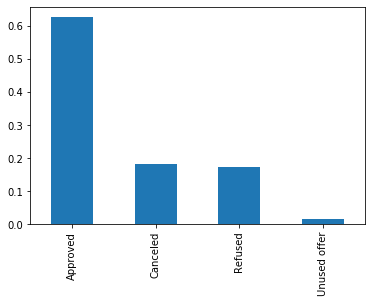

In [245]:
Merged_df.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.bar()
plt.show()
#Most previous applications were approved
#Number of refused and canceled applications were almost same. Very less pervious applications had unused offer.

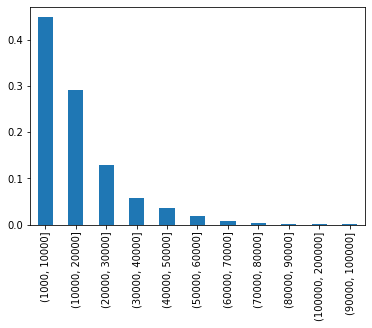

In [246]:
Merged_df['AMT_ANNUITY_BINSx'] = pd.cut(x=Merged_df['AMT_ANNUITYx'], bins=[1000,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,200000])
Merged_df.AMT_ANNUITY_BINSx.value_counts(normalize=True).plot.bar()
plt.show()
#The annuity of previous application is highest for 1000 to 10,000


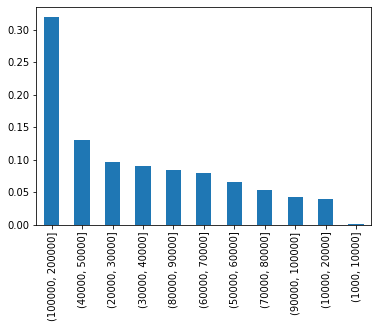

In [247]:
Merged_df['AMT_APPLICATION_BINS'] = pd.cut(x=Merged_df['AMT_APPLICATION'], bins=[1000,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,200000])
Merged_df.AMT_APPLICATION_BINS.value_counts(normalize=True).plot.bar()
plt.show()


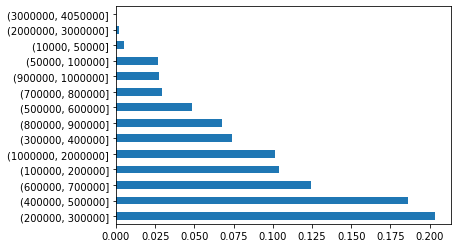

In [248]:
Merged_df['AMT_GOODS_PRICE_BINSx'] = pd.cut(x=Merged_df['AMT_GOODS_PRICEx'], bins=[10000,50000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,2000000,3000000,4050000])
Merged_df.AMT_GOODS_PRICE_BINS.value_counts(normalize=True).plot.barh()
plt.show()
#Goods price of good that client asked for (if applicable) on the previous application is high for 2lacs to 5 lacs.


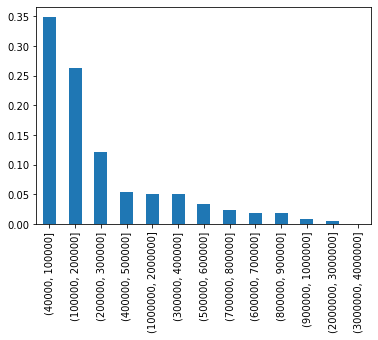

In [249]:
Merged_df['AMT_CREDIT_BINSx'] = pd.cut(x=Merged_df['AMT_CREDITx'], bins=[40000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,2000000,3000000,4000000])
Merged_df.AMT_CREDIT_BINSx.value_counts(normalize=True).plot.bar()
plt.show()
